In [2]:
import warnings
warnings.simplefilter('ignore')

In [3]:
import numpy as np
import matplotlib.pyplot as plt

from keras.models import Model
from keras.datasets import mnist
from keras.utils import to_categorical, plot_model
from keras.layers import Input, Dense, Activation, Dropout

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
n_labels = len(np.unique(y_train))
print(n_labels)
print(x_train.shape)

10
(60000, 28, 28)


In [5]:
print(y_test.shape)

(10000,)


5


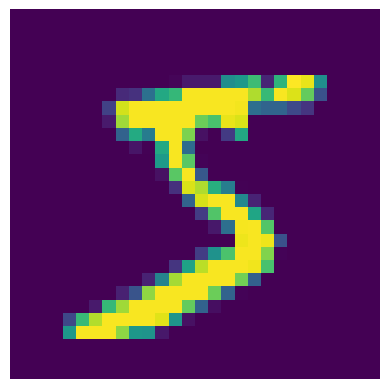

In [6]:
plt.figure()
plt.imshow(x_train[0])
plt.axis('off');
print(y_train[0])

In [7]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
print(y_train.shape, y_test.shape)

(60000, 10) (10000, 10)


In [8]:
x_train = x_train.astype('float32').reshape((-1, 784)) / 255
x_test = x_test.astype('float32').reshape((-1, 784)) / 255
print(x_train.shape, x_test.shape)

(60000, 784) (10000, 784)


In [9]:
n_hiddens = [256, 256]
dropout= 0.5

Model: "mlp-mnist"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 784)]             0         
                                                                 
 dense_1 (Dense)             (None, 256)               200960    
                                                                 
 relu_1 (Activation)         (None, 256)               0         
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 256)               65792     
                                                                 
 relu_2 (Activation)         (None, 256)               0         
                                                                 
 dropout_1 (Dropout)         (None, 256)               0 

2024-03-12 09:53:44.404165: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-03-12 09:53:44.411328: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2256] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


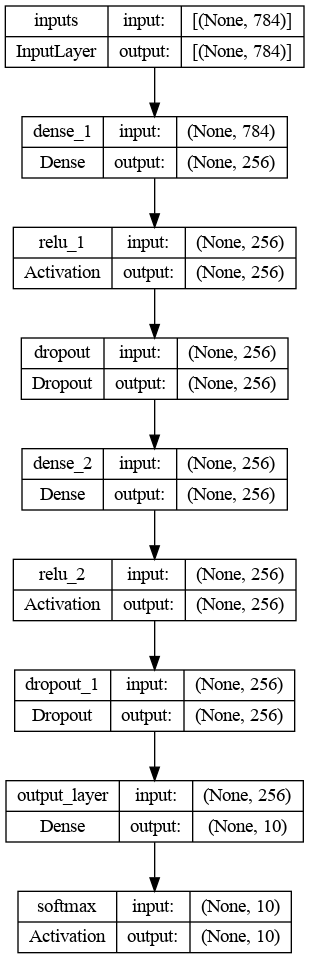

In [10]:
inputs = Input(shape=(784,) , name='inputs')
x = inputs
x = Dense(units=n_hiddens[0], name='dense_1')(x)
x = Activation('relu',name='relu_1')(x)
x = Dropout(dropout)(x)

x = Dense(units=n_hiddens[1], name='dense_2')(x)
x = Activation('relu',name='relu_2')(x)
x = Dropout(dropout)(x)

x = Dense(units=n_labels, name='output_layer')(x)
outputs = Activation('softmax',name='softmax')(x)


model = Model(inputs= inputs, outputs=outputs, name='mlp-mnist')
model.summary()
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])
plot_model(model, to_file='mlp-mnist.png', show_shapes=True)

In [11]:
model.fit(x = x_train,
          y=y_train,
          epochs=20,
          batch_size=32,
          validation_data=(x_test, y_test)
         )

Epoch 1/20
1875/1875 [==============================] - 12s 6ms/step - loss: 0.3816 - accuracy: 0.8836 - val_loss: 0.1322 - val_accuracy: 0.9606
Epoch 2/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2035 - accuracy: 0.9391 - val_loss: 0.1076 - val_accuracy: 0.9664
Epoch 3/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1705 - accuracy: 0.9488 - val_loss: 0.0941 - val_accuracy: 0.9718
Epoch 4/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1510 - accuracy: 0.9554 - val_loss: 0.0900 - val_accuracy: 0.9725
Epoch 5/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1404 - accuracy: 0.9582 - val_loss: 0.0877 - val_accuracy: 0.9735
Epoch 6/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1307 - accuracy: 0.9609 - val_loss: 0.0726 - val_accuracy: 0.9790
Epoch 7/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1223 - accuracy: 0.9632 - val_loss: 0.0843 - val_accur